<a href="https://colab.research.google.com/github/doloresgarro/Deep-Learning/blob/main/Pr%C3%A1ctica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4 - Deep Learning**
*Multiperceptrón*

# **Ejercicio 1**

*a) En base a esta información, indique:*

*▪ Cuántos ejemplos se utilizaron en el entrenamiento.*


*▪ Cuántas clases puede reconocer este multiperceptrón.*

*▪ Cuál es la precisión (accuracy) de la red sobre el conjunto de ejemplos completo.*

*▪ Cuáles son los valores de precisión de la red al responder por cada uno de los valores de clase (precision).*

*▪ Cuáles son los valores de sensibilidad de la red al responder por cada uno de los valores de clase (recall).*

*Se entreno una red neuronal multiperceptrón para resolver un problema de clasificación y al medir su desempeño sobre el conjunto de datos de entrenamiento se obtuvo la siguiente matriz de confusión:*

In [ ]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import numpy as np

# calcula las metricas precision, recall, f1-score y accuracy a partir de la matriz de confusion
# retorna tupla: ( precision, recall, f1_score, accuracy )
def calcular_metricas(conf_mat):
    precision = np.zeros(conf_mat.shape[0])  # inicializa en 0 el vector precisión, conf_mat.shape[0] --> indica el num de filas de la matriz con_mat
                                             # por lo tanto precisión va a ser una vector inicializado en 0 con el num de filas de la matriz recibida como parámetro
    for i in range(0, len(conf_mat)):
        precision[i] = conf_mat[i][i]/sum(conf_mat.T[i])  # en c/ pos divide el valor de la matriz en esa f y c por la suma de todos los elem de la matriz en la columna i

    recall = np.zeros(conf_mat.shape[0])   # recall lo mismo q lo anterior
    for i in range(0, len(conf_mat)):
        recall[i] = conf_mat[i][i]/sum(conf_mat[i])

    f1_score = 2* (precision*recall) /(precision+recall)

    accuracy =  0
    for i in range(0, len(conf_mat)):
        accuracy+=conf_mat[i][i]
    accuracy/= conf_mat.sum()        # conf_mat.sum() --> suma de elems de la matriz conf_mat

    return ( precision, recall, f1_score, accuracy )

# el parámetro metricas es una tupla ( precision, recall, f1_score, accuracy )
def imprimir_metricas( metricas ):
    (precision, recall, f1_score, accuracy) = metricas
    print('\n clase   precision    recall    f1-score')
    for i in range(0, len(precision)):
        print('%5d %10.2f %10.2f %10.2f' % (i, precision[i], recall[i], f1_score[i]))
    print('\naccuracy: %6.2f\n' % accuracy)



In [ ]:
confusion = np.array([
           [ 17, 0, 1, 0, 1 ],
           [ 0, 12, 0, 0, 0 ],
           [ 0, 0, 12, 0, 0 ],
           [ 2, 0, 0, 38, 0 ],
           [ 0, 8, 0, 0, 61 ]
           ])

print('\n Matriz de Confusión:')
print(confusion, '\n')



#calcula métricas de forma manual
metricas = calcular_metricas(confusion)
imprimir_metricas(metricas)






 Matriz de Confusión:
[[17  0  1  0  1]
 [ 0 12  0  0  0]
 [ 0  0 12  0  0]
 [ 2  0  0 38  0]
 [ 0  8  0  0 61]] 


 clase   precision    recall    f1-score
    0       0.89       0.89       0.89
    1       0.60       1.00       0.75
    2       0.92       1.00       0.96
    3       1.00       0.95       0.97
    4       0.98       0.88       0.93

accuracy:   0.92



Precisión --> proporción de predicciones correctas sobre una clase

Recall --> proporción de ejemplos de una clase que correctamente clasificados

Acurrancy --> cantidad de aciertos sobre el total de ejemplos


b) La clase con mejor valor de F1-score es la clase 3

# **Ejercicio 2**

*Se desea utilizar una red multiperceptrón para reconocer muestras de tres variedades diferentes de trigo:*

*Kama, Rosa y Canadiense.*

*Para entrenarla se utilizará una parte de los ejemplos del archivo
SEMILLAS.CSV. Estos datos fueron utilizados en el ejercicio 3 la práctica 2.*



*a) Con respecto a la arquitectura, indique:*

*▪ La cantidad de neuronas de la capa de entrada.*


*▪ La cantidad de neuronas de la capa de salida.*

*▪ La cantidad de pesos (arcos) que tiene la red si se utiliza una única capa oculta formada por 4 neuronas*

a)
- entrada: 7 + bias = 8
- salida: 3 porque tengo tres variedades de semillas
- capa oculta: 4 neuronas
- arcos:

n⋅h1​+∑​hi​⋅hi+1​+hN​⋅m



*   n --> neuronas en capa de entrada
*   m --> neuronas en capa de salida
*   hi --> neuronas en capa oculta





In [10]:
import numpy as np
import pandas as pd
import grafica as gr
from sklearn import preprocessing, metrics, model_selection

df = pd.read_csv('Semillas.csv')

X = np.array(df.iloc[:, 0:4])
nEj = X.shape[0] # cantidad de ejemplos (muestras) en los datos

#column_names = df.columns
#print(column_names)

nomClases = pd.unique(df['Clase'])
#-- la red tendrá una salida para cada tipo de flor
salidas = len(nomClases)

#-- la salida debe ser numérica --
# transforma las clases en df['Clase'] en valores numéricos basados
# en su posición en el arreglo nomClases.
clase = df['Clase']
Y=np.zeros(nEj)
for s in range(nEj):
    Y[s]=np.argwhere(nomClases == clase[s])
Y = Y.astype(int)


#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X, Y, test_size=0.30) #, random_state=42)

Y_trainB = np.zeros((len(Y_train), salidas))
for o in range(len(Y_train)):
    Y_trainB[o, Y_train[o]]=1

normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.MinMaxScaler()
    # se aplica la normalización a los conjuntos de datos X_train y X_test
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)


entradas = X_train.shape[1] # obtiene las entradas de la red
ocultas = 4 # neuronas en la capa oculta
salidas = Y_trainB.shape[1] # cantidad de clases a predecir (3)
print(entradas)
print(ocultas)
print(salidas)

# inicializo pesos y bias
# se inicializa W1 como matriz de pesos de la capa oculta
# se inicializa W2 como matriz de pesos de la capa de salida
# pesos y bias --> se inicializan aleatoriamente entre -0.5 y 0.5
# los w se van a ir ajustando durante el entrenamiento
W1 = np.random.uniform(-0.5,0.5,[ocultas, entradas])
b1 = np.random.uniform(-0.5,0.5, [ocultas,1]) # 1 --> indica una única neurona
W2 = np.random.uniform(-0.5,0.5,[salidas, ocultas])
b2 = np.random.uniform(-0.5,0.5, [salidas,1])

#=====  Calcular el error actual =====
FunH = 'logsig'
FunO = 'tansig'
if (FunO == 'tansig'):
    Y_trainB = 2 * Y_trainB - 1
# capa oculta
#FunH = 'tanh' # mapea entradas al rango [-1,1]
# capa de salida
#FunO = 'sigmoid' # mapea entradas al rango [0,1]
#if (FunO == 'sigmoid'):
#    Y_trainB = 2 * Y_trainB - 1 # --> ajusta etiquetas de clase al rango [-1,1]

# --- Calcular la rta.de la red para TODOS los ejemplos ---
# w1 --> matriz de pesos que conecta las neuronas de capa oculta con las caract de entrada
# X_train --> matriz de caract de entrada. Num de clases de entrada
# b1 --> biass
NetasH = W1 @ X_train.T + b1

# cantEj = P.shape[0]
# netasH = np.zeros([ocultas, cantEj])
# for i in range(cantEj):
#     for o in range(ocultas):
#         netasH[o,i]=b1[o]
#         for e in range(entradas):
#             netasH[o,i] = netasH[o,i] + W1[o,e]*P[i,e]

# cálculo de salidas de la red para cada capa
SalidasH = gr.evaluar(FunH, NetasH) # salidas de capa oculta
NetasO = W2 @ SalidasH + b2 # entradas de la capa de salidda
SalidasO = gr.evaluar(FunO, NetasO) # salidas de la capa de salida

# -- calcular el error --
AVGError = np.mean((Y_trainB.T - SalidasO)**2)

alfa = 0.1
CotaError = 1.0e-15
MAX_ITERA = 800
ite = 0
errorAnt = 1
while ( abs(AVGError-errorAnt) > CotaError ) and ( ite < MAX_ITERA ):
    errorAnt = AVGError
    for p in range(len(X_train)):   #para cada ejemplo
        # propagar el ejemplo hacia adelante
        netasH = W1 @ X_train[p:p+1,:].T + b1
        salidasH = gr.evaluar(FunH, netasH)
        netasO = W2 @ salidasH + b2
        salidasO = gr.evaluar(FunO, netasO)

        # calcular los errores en ambas capas
        ErrorSalida = Y_trainB[p:p+1,:].T-salidasO
        deltaO = ErrorSalida * gr.evaluarDerivada(FunO,salidasO)
        deltaH = gr.evaluarDerivada(FunH,salidasH)*(W2.T @ deltaO)

        # corregir todos los pesos
        W1 = W1 + alfa * deltaH @ X_train[p:p+1,:]
        b1 = b1 + alfa * deltaH
        W2 = W2 + alfa * deltaO @ salidasH.T
        b2 = b2 + alfa * deltaO

    # Recalcular AVGError
    NetasH = W1 @ X_train.T + b1
    SalidasH = gr.evaluar(FunH, NetasH)
    NetasO = W2 @ SalidasH + b2
    SalidasO = gr.evaluar(FunO, NetasO)
    AVGError = np.mean((Y_trainB.T - SalidasO)**2)

    ite = ite + 1
    print("ite = %3d   error = %.8f" % (ite, abs(AVGError-errorAnt)))

if (FunO == 'tansig'):
    y_pred = 2*((SalidasO>0) * 1)-1

if (FunO == 'logsig'):
    y_pred = (SalidasO>0.5) * 1

Y_pred = np.argmax(y_pred,axis=0)
#metrics.accuracy_score(y_test,evaluar(FUN,pred_test))

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))

report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix:\n%s" % report)
MM = metrics.confusion_matrix(Y_train,Y_pred)
print("Confusion matrix:\n%s" % MM)

#--- aplicando la red a los datos de testeo ---
NetasH = W1 @ X_test.T + b1
SalidasH = gr.evaluar(FunH, NetasH)
NetasO = W2 @ SalidasH + b2
SalidasO = gr.evaluar(FunO, NetasO)

if (FunO == 'tansig'):
    y_predTest = 2*((SalidasO>0) * 1)-1

if (FunO == 'logsig'):
    y_predTest = (SalidasO>0.5) * 1

Y_predTest = np.argmax(y_predTest,axis=0)

print("%% aciertos X_test : %.3f" % metrics.accuracy_score(Y_test,Y_predTest))

report = metrics.classification_report(Y_test,Y_predTest)
print("Confusion matrix:\n%s" % report)
MM = metrics.confusion_matrix(Y_test,Y_predTest)
print("Confusion matrix:\n%s" % MM)




4
4
3
ite =   1   error = 0.42461782
ite =   2   error = 0.13363024
ite =   3   error = 0.16860556
ite =   4   error = 0.07329339
ite =   5   error = 0.03859649
ite =   6   error = 0.03153529
ite =   7   error = 0.03124275
ite =   8   error = 0.02982490
ite =   9   error = 0.02556523
ite =  10   error = 0.02019221
ite =  11   error = 0.01533402
ite =  12   error = 0.01152827
ite =  13   error = 0.00872892
ite =  14   error = 0.00672816
ite =  15   error = 0.00531679
ite =  16   error = 0.00432706
ite =  17   error = 0.00363431
ite =  18   error = 0.00314778
ite =  19   error = 0.00280135
ite =  20   error = 0.00254663
ite =  21   error = 0.00234850
ite =  22   error = 0.00218233
ite =  23   error = 0.00203207
ite =  24   error = 0.00188849
ite =  25   error = 0.00174752
ite =  26   error = 0.00160846
ite =  27   error = 0.00147249
ite =  28   error = 0.00134149
ite =  29   error = 0.00121733
ite =  30   error = 0.00110142
ite =  31   error = 0.00099467
ite =  32   error = 0.00089741
it

# **Ejercicio 3**

*El archivo Vinos.csv tiene información referida a 13 características químicas y/o visuales de varias muestras de vinos pertenecientes a 3 clases distintas.*

*Utilice el 80% de los ejemplos del archivo Vinos.csv para entrenar un multiperceptrón que sea capaz que distinguir entre las 3 clases de vinos. Observe la tasa de acierto obtenida sobre el 20% restante.*

In [18]:
import math
import chardet # para detectar la codificacion de caracteres usada
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

df = pd.read_csv('Vinos.csv', sep=';', encoding='utf-8')
df


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [19]:
# divido datos del df
# random_state hace que se obtenga el mismo subconjunto de entrenamiento
# cada vez que se ejecute el código con el mismo valor de random_state
X_train = df.sample(frac = 0.8, random_state = 0) # contiene 80% de los datos
x_test = df.drop(X_train.index) # contiene el 20% restante de los datos

# rtas esperadas: clases
Y = np.array(X_train.iloc[:,0]) # selecciona filas de primera columna del df --> clase

# valores de entradas
X = X_train.iloc[:, 1:] # contiene de la columa 1 todos los datos
X = np.array(X) # los pone en un array


# valores con los que testeo
X_test = np.array(x_test.iloc[:, 1:])
Y_test = np.array(x_test.iloc[:, 0])


# normalizo entrada
normalizarEntrada = 1
if normalizarEntrada:
  # Escala valores entre 0 y 1
  min_max_scaler = preprocessing.MinMaxScaler()
  X = min_max_scaler.fit_transform(X)
  X_test = min_max_scaler.fit_transform(X_test)

  # X_train = min_max_scaler.fit_transform(X_train)
   # X_test = min_max_scaler.transform(X_test)

print("Cant datos de entrenamiento: ", len(X))
print("cant de datos testeo: ", len(X_test))

Cant datos de entrenamiento:  142
cant de datos testeo:  36


In [20]:
entradas = X.shape[1] # num de columnas del arreglo --> 13
#print (entradas)
ocultas = 12
salidas = Y.shape[0]  # num de elementos en la dimension 0 --> 142
#print(salidas)

alfa = 0.001
MAX_ITE = 1000

FunH = 'identity'

# Creación de modelo
modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='sgd', activation=FunH, tol=0.001,
                       verbose=False)

# Entrenamiento del modelo
modelo.fit(X, Y)

modelo.out_activation_ = 'softmax'

# Medición del entrenamiento
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_test)

# imprimo rtas
print(Y_pred)
print(Y_test)


# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred == Y_test).sum()/len(Y_test)) )
print('      Score: %6.2f%%' % (score) )


# Y_pred == Y_test --> devuelve true si la predic es correcta
# .sum --> suma el total de true de la operación anterior

13
142
[1 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 3 3 3 2 2 2 3 3 3 3]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3]
Efectividad:  83.33%
      Score:   0.83%


# **Ejercicio 4**

*El archivo Balance.csv tiene información sobre un experimento psicológico realizado para evaluar el aprendizaje en los niños.*

*Cada fila de la tabla tiene las características de una balanza, referidas a la longitud de los brazos izquierdo y derecho de la balanza y al peso que hay en cada brazo, y un atributo que indica si la balanza se inclina al lado izquierdo (L), derecho (R), o está balanceada (B).*

*Utilice una parte de los ejemplos para entrenar un multiperceptrón que sea capaz que predecir si la balanza está inclinada a derecha, a izquierda o si está balanceada. Analice la precisión de la red sobre los ejemplos
de entrenamiento y sobre los de testeo.*

    Balance  LeftWeight  LeftDist  RightWeight  RightDist
0         B           1         1            1          1
1         R           1         1            1          2
2         R           1         1            1          3
3         R           1         1            1          4
4         R           1         1            1          5
..      ...         ...       ...          ...        ...
620       L           5         5            5          1
621       L           5         5            5          2
622       L           5         5            5          3
623       L           5         5            5          4
624       B           5         5            5          5

[625 rows x 5 columns]


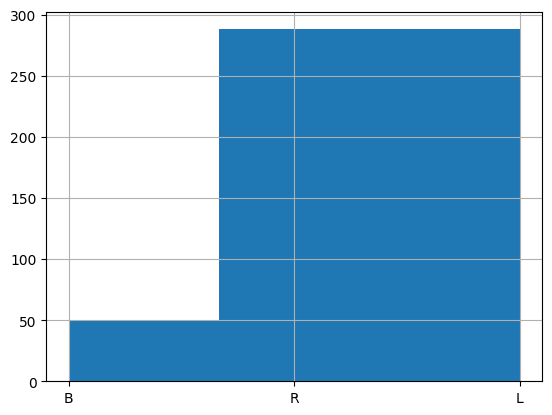

In [50]:
import math
import chardet # para detectar la codificacion de caracteres usada
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

#df = pd.read_csv('Balance.csv', sep=';', encoding='utf-8' )
#df['Balance'].hist(bins=3) # accede a la columna 'Balance'
# y con hist(bins=3) genera histograma de los valores de la colum 'Balance'
# bins = 3 --> indica que los valores en la colum se dividirán en tres intervalos


#-- detectando la codificación de caracteres usada ----
with open('Balance.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
# %% Carga de dataset con formato R, G, B, Color
df = pd.read_csv('Balance.csv', encoding=result['encoding'])

# Para hacer una inspección rápida de los datos
#print(df.head())
#print(df.describe())
df['Balance'].hist(bins=3)
print(df)


In [74]:
# otra forma de hacerlo comparado al Ejercicio 3

# %% separa atributos y clases
X_raw = np.array(df.iloc[:,1:])  # recupera todas las columnas salvo la primera (clase)
#X_raw = np.array(df.iloc[:,0:-1])
Y_raw = np.array(df.iloc[:,-1])    # recupera solo la última columna (es la clase)
print("X_raw", X_raw)
print("---------------------------------------")
# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
Y_binario = binarizer.fit_transform(Y_raw)

print('Las clases del dataset son :', binarizer.classes_)
#print(Y_raw)
# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()
X_raw  = scaler.fit_transform( X_raw )

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.3 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)

print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))



X_raw [[1 1 1 1]
 [1 1 1 2]
 [1 1 1 3]
 ...
 [5 5 5 3]
 [5 5 5 4]
 [5 5 5 5]]
---------------------------------------
Las clases del dataset son : [0 1 2 3 4]

Datos de Entrenamiento: 437   Datos de Testeo: 188


In [77]:
#entradas = X.shape[1] # num de columnas del arreglo --> 13
#print (entradas)
ocultas = 8
#salidas = Y.shape[0]  # num de elementos en la dimension 0 --> 142
#print(salidas)

alfa = 0.001
MAX_ITE = 1000

FunH = 'tanh'

# Creación de modelo
modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='sgd', activation=FunH, tol=0.001,
                       verbose=False)

# Entrenamiento del modelo
modelo.fit(X, Y)

modelo.out_activation_ = 'softmax'

#  ########### Medición del testeo ######################
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_raw)

# "invierte" la transformacion b
# inaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f%%' % (score) )

ValueError: ignored

# **Ejercicio 5**

*El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos*

*1.Nombre del animal 2. Tiene Pelo 3. Plumas 4. Huevos 5. Leche
Vuela 7. Acuático 8. Depredador 9. Dentado 10. Vertebrado 11. Branquias 12. Venenoso 13. Aletas 14. Patas 15. Cola 16. Domestico 17. Tamaño gato 18. Clase*


*Salvo los atributos 1 y 18 que contienen texto y el 14 que contiene el número de patas del animal, el resto
toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo 18):
mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.*



*Entrene un multiperceptrón que sea capaz de clasificar un animal en una de las 7 clases. Utilice el 70% de
los ejemplos para entrenar y el 30% para realizar el testeo. Realice al menos 10 ejecuciones
independientes de la configuración seleccionada para respaldar sus afirmaciones referidas a la
performance del modelo.*

In [78]:
import math
import chardet # para detectar la codificacion de caracteres usada
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [87]:
import chardet

with open('zoo.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Codificación detectada: {encoding}")

df = pd.read_csv('zoo.csv', encoding=encoding)
df


Codificación detectada: ISO-8859-1


,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,canguro,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mamifero
97,avispa,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Insecto
98,lobo,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
99,gusano,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrado


Clases del dataset:  ['Anfibio' 'Ave' 'Insecto' 'Invertebrado' 'Mamifero' 'Pez' 'Reptil']

Datos de Entrenamiento: 71   Datos de Testeo: 30
Cant datos de entrenamiento:  71
cant de datos testeo:  30


<Axes: >

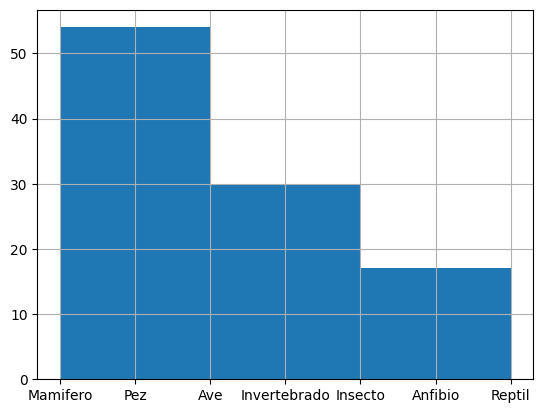

In [91]:
# divido datos del df
X_train = df.sample(frac = 0.7, random_state = 1) # contiene 70% de los datos
x_test = df.drop(X_train.index) # contiene el 30% restante de los datos

# valores de entradas
X = X_train.iloc[:, 1:-1] # entradas --> todas las colum menos la ult (clase)
X = np.array(X) # los pone en un array

# rtas esperadas
Y = np.array(X_train.iloc[:,-1]) # salida --> ult columna (clase)

# valores con los que testeo
X_test = np.array(x_test.iloc[:, 1:-1]) # valores de entrada con los q vamos a testear
Y_test = np.array(x_test.iloc[:, -1]) # valores de salida con los que vamos a testear

# BINARIZO LAS SALIDAS --> devuelve 1 unicamente para la clase correspondiente
binarizer = preprocessing.LabelBinarizer()

Y_bin = binarizer.fit_transform(Y)
Y_test_bin = binarizer.fit_transform(Y_test)

print("Clases del dataset: ", binarizer.classes_)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_bin), len(Y_test_bin) ))



# normalizo entrada
normalizarEntrada = 1
if normalizarEntrada:
  # Escala valores entre 0 y 1
  min_max_scaler = preprocessing.MinMaxScaler()
  X = min_max_scaler.fit_transform(X)
  X_test = min_max_scaler.fit_transform(X_test)

print("Cant datos de entrenamiento: ", len(X))
print("cant de datos testeo: ", len(X_test))

df['Clase'].hist(bins = 3)

In [118]:
entradas = X.shape[1] # num de columnas del arreglo --> 13
#print (entradas)
ocultas = 10
salidas = Y.shape[0]  # num de elementos en la dimension 0 --> 142
#print(salidas)

alfa = 0.001
MAX_ITE = 1000

FunH = 'identity'

# Creación de modelo
modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='sgd', activation=FunH, tol=0.001,
                       verbose=False)

# Entrenamiento del modelo
modelo.fit(X, Y)

modelo.out_activation_ = 'softmax'

# Medición del entrenamiento
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_test)

# imprimo rtas
#print(Y_pred)
#print(Y_test)


# para calcular efect, score, matriz confusión y no obtener formato binario
# hacemos la transformación inversa
#Y_pred_it = binarizer.inverse_transform(Y_pred)
Y_test_it = binarizer.inverse_transform(Y_test_bin)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred == Y_test_it).sum()/len(Y_test_it)) )
print('      Score: %6.2f%%' % (score) )


# Y_pred == Y_test --> devuelve true si la predic es correcta
# .sum --> suma el total de true de la operación anterior

Efectividad:  90.00%
      Score:   0.90%


# **Ejercicio 6**

*Los archivos Segment_Train.csv y Segment_Test.csv contienen información referida a regiones de 3x3 pixeles pertenecientes a 7 imágenes distintas. Cada una corresponde a uno de los siguientes tipos de superficie: ladrillo, cielo, follaje, cemento, ventana, camino y pasto.*

*Cada región de 3x3 ha sido caracterizada por 19 atributos numéricos:*
1. region-centroid-col: la columna del pixel central de la región.
2. region-centroid-row: la fila del pixel central de la región.
3. region-pixel-count: el número de pixeles de la región = 9.
4. short-line-density-5: el resultado de un algoritmo de extracción de líneas que cuenta la
cantidad de líneas de bajo contraste que atraviesan la región.
5. short-line-density-2: ídem anterior para líneas de alto contraste.
6. vedge-mean: medida del contraste entre pixeles adyacentes. Este atributo contiene el valor
promedio y el siguiente la desviación. Estas medidas sirven para detectar la presencia de un eje
vertical.
7. vegde-sd: (ver 6)
8. hedge-mean: ídem 6 para eje horizontal. Contiene el valor medio y el siguiente la desviación.
9. hedge-sd: (ver 8).
10. intensity-mean: El promedio calculado sobre la región de la forma (R + G + B)/3
11. rawred-mean: el promedio sobre la región de los valores R.
12. rawblue-mean: el promedio sobre la región de los valores B.
13. rawgreen-mean: el promedio sobre la región de los valores G.
14. exred-mean: Medida de exceso de color rojo: (2R - (G + B))
15. exblue-mean: Medida de exceso de color azul: (2B - (G + R))
16. exgreen-mean: Medida de exceso de color verde: (2G - (R + B))
17. value-mean: Transformación no lineal 3D de RGB.
18. saturatoin-mean: (ver 17)
19. hue-mean: ver 17

*El atributo 20 corresponde al número de imagen de la cual fue extraída la región de 3x3. Sus valores son:
1 (ladrillo), 2 (cemento), 3(follaje), 4 (pasto), 5 (camino), 6 (cielo), 7 (ventana).*

*Entrene una red neuronal multiperceptrón para que dada una región de 3x3, representada a través de los 19 atributos indicados anteriormente, sea capaz de identificar a cuál de las 7 imágenes corresponde.*

*Utilice los ejemplos del archivo Segment_Train.csv para entrenar y los del archivo Segment_Test.csv para realizar el testeo.*


*Realice al menos 10 ejecuciones independientes de la configuración seleccionada para respaldar sus afirmaciones referidas a la performance del modelo.*

In [119]:
import math
import chardet # para detectar la codificacion de caracteres usada
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [123]:
import chardet

with open('Segment_Train.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Codificación detectada: {encoding}")

df_train = pd.read_csv('Segment_Train.csv', encoding=encoding)
print("df-train: ")
print(df_train)

#----------------------------------------------

with open('Segment_Test.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Codificación detectada: {encoding}")

df_test = pd.read_csv('Segment_Test.csv', encoding=encoding)
print("df_test: ")
print(df_test)

Codificación detectada: ascii
df-train: 
        REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
GRASS                 110.0                189.0                   9   
GRASS                  86.0                187.0                   9   
GRASS                 225.0                244.0                   9   
GRASS                  47.0                232.0                   9   
GRASS                  97.0                186.0                   9   
...                     ...                  ...                 ...   
CEMENT                 32.0                158.0                   9   
CEMENT                  8.0                162.0                   9   
CEMENT                128.0                161.0                   9   
CEMENT                150.0                158.0                   9   
CEMENT                124.0                162.0                   9   

        SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
GRASS             

Clases del dataset:  [  1.   2.   4.   5.   6.   7.   8.   9.  11.  14.  16.  18.  20.  21.
  22.  23.  26.  29.  33.  34.  36.  37.  39.  41.  42.  43.  44.  45.
  52.  54.  57.  58.  59.  60.  62.  63.  66.  67.  68.  69.  71.  72.
  74.  77.  79.  80.  85.  86.  87.  88.  89.  90.  92.  93.  94.  95.
  96. 101. 103. 105. 107. 112. 117. 118. 120. 121. 122. 123. 124. 125.
 127. 130. 134. 136. 137. 138. 140. 141. 142. 143. 145. 146. 150. 151.
 152. 156. 157. 160. 162. 163. 165. 167. 169. 174. 176. 178. 179. 181.
 182. 184. 186. 187. 188. 189. 190. 191. 196. 197. 198. 200. 202. 204.
 205. 206. 207. 208. 210. 214. 217. 219. 222. 223. 225. 226. 228. 229.
 230. 231. 232. 233. 235. 236. 237. 239. 242. 243. 244. 250. 252.]

Datos de Entrenamiento: 2100   Datos de Testeo: 210


<Axes: >

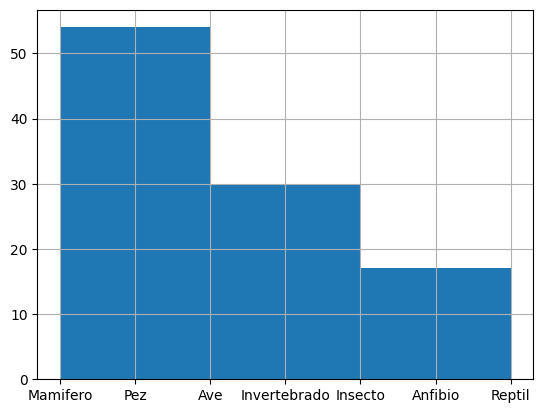

In [127]:
# valores de entradas
X = df_train.iloc[:, 1:] # entradas --> todas menos la clase
X = np.array(X) # los pone en un array
#print(X)

# rtas esperadas
Y = np.array(df_train.iloc[:,0]) # salida --> columna de clases

# valores con los que testeo
X_test = np.array(df_test.iloc[:, 1:]) # valores de entrada con los q vamos a testear
Y_test = np.array(df_test.iloc[:, 0]) # valores de salida con los que vamos a testear

# BINARIZO LAS SALIDAS --> devuelve 1 unicamente para la clase correspondiente
binarizer = preprocessing.LabelBinarizer()

Y_bin = binarizer.fit_transform(Y)
Y_test_bin = binarizer.fit_transform(Y_test)

print("Clases del dataset: ", binarizer.classes_)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_bin), len(Y_test_bin) ))



# normalizo entrada
normalizarEntrada = 1
if normalizarEntrada:
  # Escala valores entre 0 y 1
  min_max_scaler = preprocessing.MinMaxScaler()
  X = min_max_scaler.fit_transform(X)
  X_test = min_max_scaler.fit_transform(X_test)

#print("Cant datos de entrenamiento: ", len(X))
#print("Cant de datos testeo: ", len(X_test))

df['Clase'].hist(bins = 3)

# **Ejercicio 8**

*Utilizando el archivo Iris.csv que contiene información referida a la longitud y al ancho de sépalos y pétalos de tres especies de flores: iris setosa, iris versicolor e iris virginica.*

*a) Entrenar una multiperceptrón que aprenda a clasificar las 3 clases de flores.*


In [128]:
import math
import chardet # para detectar la codificacion de caracteres usada
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [130]:
import chardet

with open('Iris.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Codificación detectada: {encoding}")

df_train = pd.read_csv('Iris.csv', encoding=encoding)
print("df-train: ")
print(df_train)


Codificación detectada: ascii
df-train: 
     sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


Clases del dataset:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Datos de Entrenamiento: 150   Datos de Testeo: 30


<Axes: >

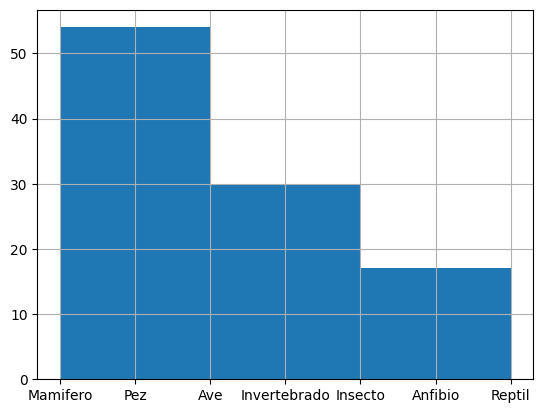

In [207]:
# valores de entradas
X = df_train.iloc[:, :-1] # entradas --> todas las colum menos la ult (clase)
X = np.array(X) # los pone en un array
#print(X)

# rtas esperadas
Y = np.array(df_train['class']) # salida --> columna de clases
#print(Y)

# BINARIZO LAS SALIDAS --> devuelve 1 unicamente para la clase correspondiente
binarizer = preprocessing.LabelBinarizer()

Y_bin = binarizer.fit_transform(Y)
print("Clases del dataset: ", binarizer.classes_)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_bin), len(Y_test) ))

# escala valores entre 0 y 1
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
#print(X)

# otra forma de hacer lo anterior:
# normalizo entrada
#normalizarEntrada = 1
#if normalizarEntrada:
  # Escala valores entre 0 y 1
  #min_max_scaler = preprocessing.MinMaxScaler()
  #X = min_max_scaler.fit_transform(X)
  #X_test = min_max_scaler.fit_transform(X_test)


df['Clase'].hist(bins = 3)

In [156]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import optimizers

from matplotlib import pyplot as plt
import plotly.express as px

In [209]:
# ENTRENO RED
entradas = X.shape[1] # num de columnas del arreglo
#print (entradas)
ocultas = 2
salidas = 3
print("SALIDASSSSSSSSSS: ", salidas)
FunH = 'tanh'

print(X.shape)      # imprime (150,4) --> (f,c) del df
print(X_test.shape) # imrpime (30,4)


alfa = 0.01
EPOCAS = 500
TAM_LOTE = 32

# Creación de modelo
modelo = Sequential()

# Agrego capas
modelo.add(Dense(ocultas, activation=FunH, input_dim=entradas)) # --> capa oculta
modelo.add(Dense(salidas, activation = 'softmax')) # --> capa de salida

modelo.summary()

optimizador = optimizers.SGD(learning_rate = alfa)
modelo.compile(optimizer=optimizador, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Convierte las etiquetas en one-hot
Y = pd.get_dummies(Y)

# Separa ejemplos para entrenamiento y testeo
TEST_SIZE = 0.2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=TEST_SIZE)#, random_state=42)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_bin), len(Y_test) ))



# Entrenamiento del modelo, guarda la historia del progreso
modelo.fit(x=X_train, y=Y, batch_size=TAM_LOTE, epochs=EPOCAS)


SALIDASSSSSSSSSS:  3
(150, 4)
(30, 4)
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 2)                 10        
                                                                 
 dense_75 (Dense)            (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Datos de Entrenamiento: 150   Datos de Testeo: 30


ValueError: ignored

In [ ]:
modelo.out_activation_ = 'softmax'

# Medición del entrenamiento
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_test)

# imprimo rtas
#print(Y_pred)
#print(Y_test)


# para calcular efect, score, matriz confusión y no obtener formato binario
# hacemos la transformación inversa
#Y_pred_it = binarizer.inverse_transform(Y_pred)
Y_test_it = binarizer.inverse_transform(Y_test_bin)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred == Y_test_it).sum()/len(Y_test_it)) )
print('      Score: %6.2f%%' % (score) )


# Y_pred == Y_test --> devuelve true si la predic es correcta
# .sum --> suma el total de true de la operación anterior



*b) Utilice Python para calcular la matriz de confusión y calcule de forma manual las métricas de precision, recall, accuracy y f1-score. Luego utilice la función classification_report de SciKit-Learn para
comparar los resultados.*

In [ ]:
# calcula las metricas precision, recall, f1-score y accuracy a partir de la matriz de confusion
# retorna tupla: ( precision, recall, f1_score, accuracy )
def calcular_metricas(conf_mat):
    precision = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        precision[i] = conf_mat[i][i]/sum(conf_mat.T[i])

    recall = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        recall[i] = conf_mat[i][i]/sum(conf_mat[i])

    f1_score = 2* (precision*recall) /(precision+recall)

    accuracy =  0
    for i in range(0, len(conf_mat)):
        accuracy+=conf_mat[i][i]
    accuracy/= conf_mat.sum()

    return ( precision, recall, f1_score, accuracy )

# el parámetro metricas es una tupla ( precision, recall, f1_score, accuracy )
def imprimir_metricas( metricas ):
    (precision, recall, f1_score, accuracy) = metricas
    print('\n clase   precision    recall    f1-score')
    for i in range(0, len(precision)):
        print('%5d %10.2f %10.2f %10.2f' % (i, precision[i], recall[i], f1_score[i]))
    print('\naccuracy: %6.2f\n' % accuracy)
